# Clase 10: Distribuciones de probabilidad

Veamos varios ejemplos de las distribuciones de probabilidad más usadas. Para verificarlas reutilizaremos algunas funciones de la clase pasada.

In [1]:
import numpy as np

In [2]:
def prob(evento, dist):
    '''
    Calcula la probabilidad de un evento a partir de una distribución. El evento debe ser una función que
    regresa verdadero o falso y la distribución debe ser un diccionario (evento: frecuencia)
    '''
    
    conjunto = {e for e in dist.keys() if evento(e)}
    total = sum(d for d in dist.values())
    frec = sum(dist[e] for e in conjunto)
    return frec/total

## Distribución binomial

Consideremos un experimento que puede dar un resultado positivo con probabilidad $p$ o negativo con probabilidad $1 - p$. Preguntamos cuál es la probabilidad de obtener $n$ resultados positivos cuando se realiza el experimento $r$ veces de manera independiente.

A manera de ejemplo preguntemos primero cuál es la probabilidad de obtener $3$ positivos cuando se realiza el experimento $4$ veces. Estos tres resultados positivos pueden aparecer de las siguientes maneras
$$
\text{+++-},\,\text{++-+},\,\text{+-++},\,\text{-+++}\,.
$$
La probabilidad de obtener el primer resultado es
$$
p\times p\times p\times (1-p) = p^3 (1-p)\,.
$$
La probabilidad de las otras tres posibilidades es igual y entonces
$$
P(3;4,p) = 3 p^3(1-p)\,.
$$

La fórmula general es

$$
P(n;r,p) = \frac{r!}{n!(n-r)!} p^n (1-p)^{r - n}
$$

In [3]:
def realizar_experimento(muestra, dist):
    '''
    Definimos una función que simula realizar un experimento.
    Toma una muestra que es una lista con todos los posibles resultados de realizar n-1 experimentos
    y regresa una lista con todos los posibles resultados de realizar n experimentos.
    muestra y dist son la distribución de n-1 experimentos y la distribución de un experimento.
    '''
    nueva = {}
    if len(muestra) == 0:
        return {e:p for e, p in dist.items()}
    for e, prob_e in muestra.items():
        for res, prob_r in dist.items():
            nuevo_evento = e + res
            nueva_prob = prob_e*prob_r
            nueva[nuevo_evento] = nueva_prob
    return nueva

def r_experimentos(r, p):
    '''
    Simula realizar r experimentos, toma el número de experimentos y la probabilidad de éxito.
    '''
    dist_un_experimento = {'+': p, '-': (1-p)}
    muestra = {}
    for i in range(r):
        muestra = realizar_experimento(muestra, dist_un_experimento)
    return muestra

def n_exitos(n, e):
    return e.count('+') == n

In [4]:
def binomial_fuerza_bruta(n, r, p):
    '''
    Calcula la distribución polinomial a fuerza bruta: Simula la realización de r experimentos
    y cuenta los casos en los que hay n éxitos.
    '''
    dist = r_experimentos(r, p)
    def evento(e):
        return n_exitos(n, e)
    return prob(evento, dist)

In [5]:
binomial_fuerza_bruta(3, 4, 0.1)

0.0036

In [79]:
from scipy.special import comb

def binomial(n, r, p):
    return comb(r, n)*p**n*(1-p)**(r - n)

In [7]:
binomial(3, 100, 0.1)

0.005891602469304398

In [8]:
binomial_fuerza_bruta(3, 20, 0.1)

0.19011987137645303

In [9]:
binomial(3,20,0.1)

0.19011987137619904

In [10]:
import matplotlib.pyplot as plt

In [11]:
def probs(r, p):
    return [binomial(n, r, p) for n in range(r+1)]

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


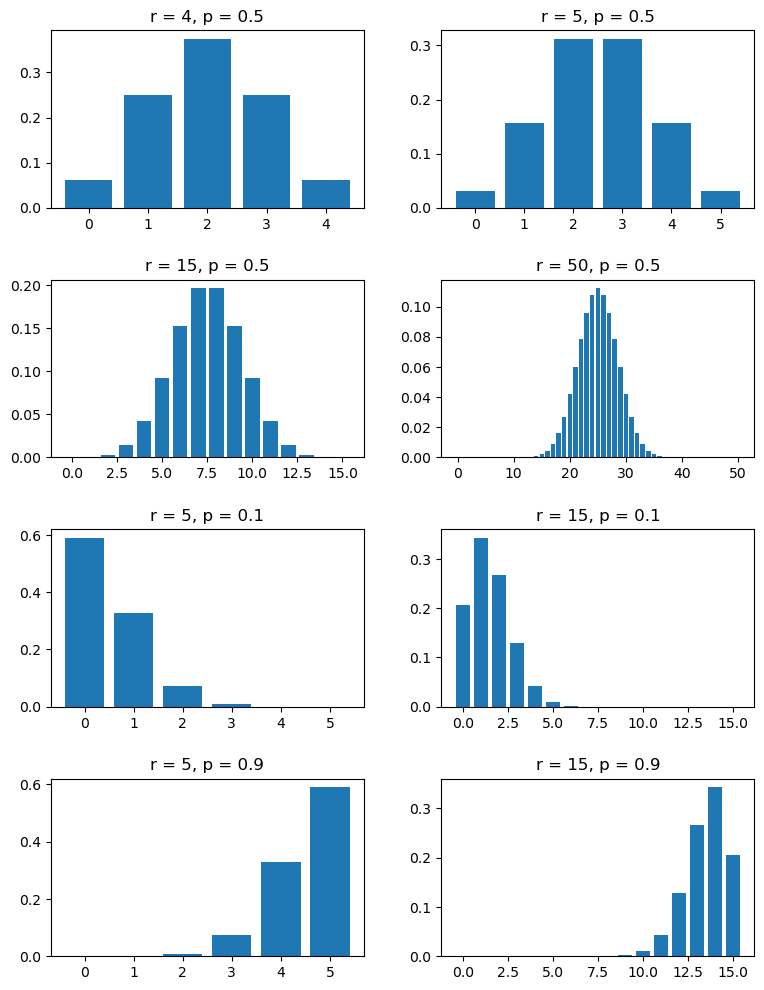

In [12]:
fig = plt.figure(figsize=(8,20), dpi= 100)

ax1 = fig.add_subplot(8,2,1)
ax2 = fig.add_subplot(8,2,2)
ax3 = fig.add_subplot(8,2,3)
ax4 = fig.add_subplot(8,2,4)
ax5 = fig.add_subplot(8,2,5)
ax6 = fig.add_subplot(8,2,6)
ax7 = fig.add_subplot(8,2,7)
ax8 = fig.add_subplot(8,2,8)

ax1.bar(range(4+1), probs(4,0.5))
ax2.bar(range(5+1), probs(5,0.5))
ax3.bar(range(15+1), probs(15,0.5))
ax4.bar(range(50+1), probs(50,0.5))
ax5.bar(range(5+1), probs(5,0.1))
ax6.bar(range(15+1), probs(15,0.1))
ax7.bar(range(5+1), probs(5,0.9))
ax8.bar(range(15+1), probs(15,0.9))
        
ax1.set_title('r = 4, p = 0.5')
ax2.set_title('r = 5, p = 0.5')
ax3.set_title('r = 15, p = 0.5')
ax4.set_title('r = 50, p = 0.5')
ax5.set_title('r = 5, p = 0.1')
ax6.set_title('r = 15, p = 0.1')
ax7.set_title('r = 5, p = 0.9')
ax8.set_title('r = 15, p = 0.9')

fig.tight_layout(pad=2.0)


fig.show()

* Valor esperado: $\langle n \rangle = rp$
* Varianza: $\sigma^2 = np(1-p)$

In [13]:
import random

def realizacion(r, p):
    probs = np.random.rand(r)
    return probs < p

def num_exitos(num_realizaciones, r, p):
    # probando me dí cuenta que al sumar me regresa el número
    # de elementos que son True
    return np.array([sum(realizacion(r, p)) for i in range(num_realizaciones)])

In [14]:
num_exitos(3, 10, 0.2).mean()

1.0

In [15]:
num_exitos(10000, 10, 0.2).mean()

2.0165

In [16]:
num_exitos(3, 10, 0.2).std()

0.816496580927726

In [17]:
num_exitos(10000, 10, 0.2).std()

1.2675955821948892

In [18]:
np.sqrt(10*0.2*0.8)

1.2649110640673518

## Distribución de Poisson

Es la probabilidad de obtener $n$ eventos de un proceso que en promedio ocurre $\lambda$ veces en un intervalo.

Si dividimos el continuo en $r$ subintervalos, y la probabilidad de que el evento ocurra en un subintervalo dado es $\lambda/r$, entonces podemos usar la distribución binomial

$$
P(n; r, \lambda/r) = \frac{\lambda^n}{r^n}\left(1 - \frac{\lambda^n}{r^n}\right)^{r - n}\frac{r!}{n!(r-n)!}
$$

Si hay infinitos subintervalos $r\rightarrow \infty$ tenemos que

$$
\frac{r!}{(r-n)!} = r(r-1)(r-2)...(r-n + 1) \rightarrow r^n\,,
$$
$$
\left(1 - \frac{\lambda^n}{r^n}\right)^{r - n} \rightarrow \left(1 - \frac{\lambda^n}{r^n}\right)^{r} \rightarrow e^{-\lambda}
$$

(La última se puede demostrar expandiendo ambos lados en Taylor). Así obtenemos la distribución de Poisson:

$$
P(n; \lambda) = \frac{\lambda^n}{n!} e^{-\lambda}
$$

In [19]:
def poisson(n, lamda):
    return lamda**n*np.exp(-lamda)/np.math.factorial(n)

Ejemplo: Si en promedio caen dos rayos por minuto en una tormenta eléctrica. ¿Cuál es la probabilidad de obtener 5 rayos en un minuto?

In [20]:
poisson(5,2)

0.03608940886309672

Ejemplo: Número de neutrinos detectados en intervalos de 10 segundos por un experimento el 27 de febrero de 1987. Alrededor de esa fecha se observó laa explosión de la supernova SN1987a. 

In [21]:
datos = np.array([[0,1042],
         [1,860],
         [2,307],
         [3,78],
         [4,15],
         [5,3],
         [6,0],
         [70,0],
         [8,0],
         [9,1]])

El punto con 9 eventos es anómalo. Excluyámoslo por ahora y calculemos el número promedio de eventos en un intervalo de 10 segundos

In [22]:
lamda = sum(datos[:-1,0]*datos[:-1,1])/sum(datos[:-1,1])

In [23]:
predicciones = np.array([poisson(n, lamda)*sum(datos[:-1,1]) for n in range(10)])

In [24]:
predicciones

array([1.06347823e+03, 8.22638474e+02, 3.18170152e+02, 8.20386667e+01,
       1.58649613e+01, 2.45442307e+00, 3.16430683e-01, 3.49672084e-02,
       3.38104840e-03, 2.90595772e-04])

La mayoría de intervalos siguen una distribución de Poisson que se atribuye a un ruido de fondo. El intervalo con 9 eventos no sigue esa distribución y se puede decir que se detectó la emisión de neutrinos por parte de la supernova. Veremos un criterio para esto más adelante.

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


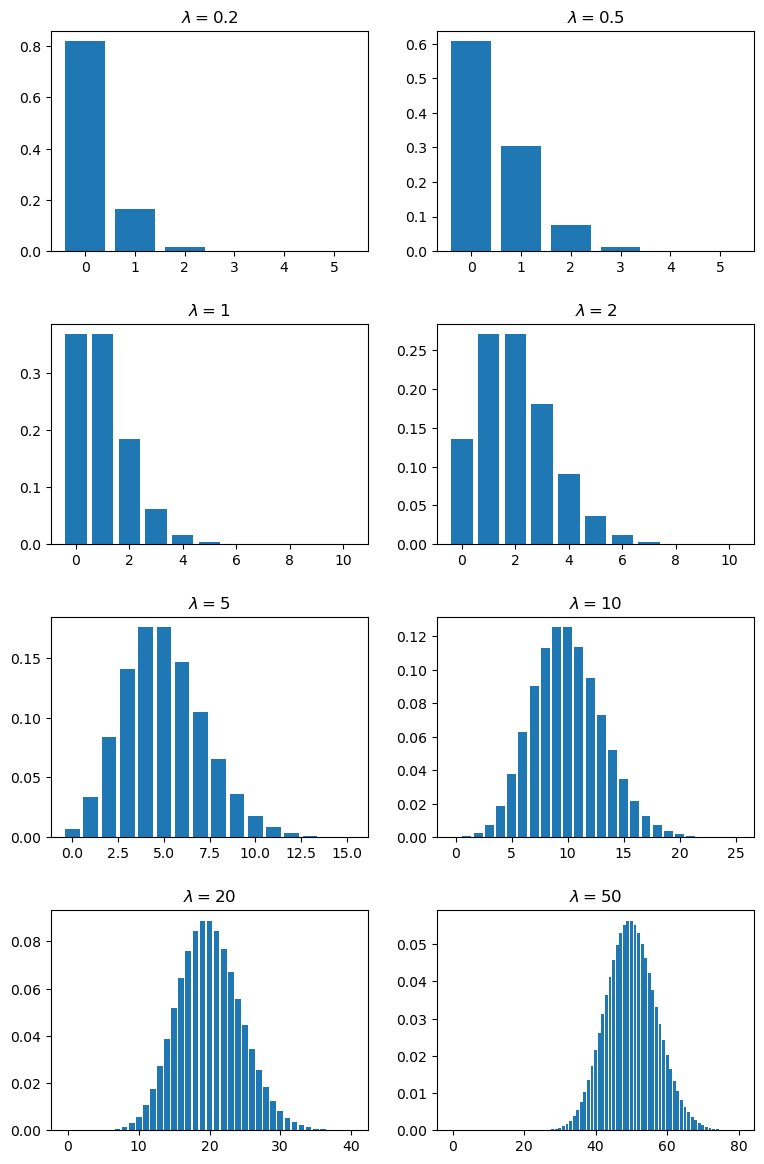

In [25]:
def probs(lamda, m):
    return [poisson(n, lamda) for n in range(m+1)]

fig = plt.figure(figsize=(8,12), dpi= 100)

ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)

ax1.bar(range(5+1), probs(0.2, 5))
ax2.bar(range(5+1), probs(0.5, 5))
ax3.bar(range(10+1), probs(1, 10))
ax4.bar(range(10+1), probs(2, 10))
ax5.bar(range(15+1), probs(5, 15))
ax6.bar(range(25+1), probs(10, 25))
ax7.bar(range(40+1), probs(20, 40))
ax8.bar(range(80+1), probs(50, 80))
        
ax1.set_title('$\lambda = 0.2$')
ax2.set_title('$\lambda = 0.5$')
ax3.set_title('$\lambda = 1$')
ax4.set_title('$\lambda = 2$')
ax5.set_title('$\lambda = 5$')
ax6.set_title('$\lambda = 10$')
ax7.set_title('$\lambda = 20$')
ax8.set_title('$\lambda = 50$')

fig.tight_layout(pad=2.0)


fig.show()

In [26]:
probs(0.2, 5)

[0.8187307530779818,
 0.1637461506155964,
 0.016374615061559638,
 0.001091641004103976,
 5.45820502051988e-05,
 2.183282008207952e-06]

* Valor esperado: $\langle n \rangle = \lambda$
* Varianza: $\sigma^2 = \lambda$

## Tareas

### Tarea 5.6

Un cierto sensor se deja abierto por un segundo. El sensor consiste en $r$ pixeles y en promedio el sensor es golpeado por $2$ partículas por segundo, tal que la probabilidad de detectar una partícula en un pixel dado es de $2/r$ (para $r \gg 2$). Grafique la distribución de probabilidad de observar $n$ partículas para un pixel dado, en función de $n$, para diferentes valores de $r$:

* Usando la distribución binomial.

* ¿Cuándo es posible usar la distribución de Poisson?

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


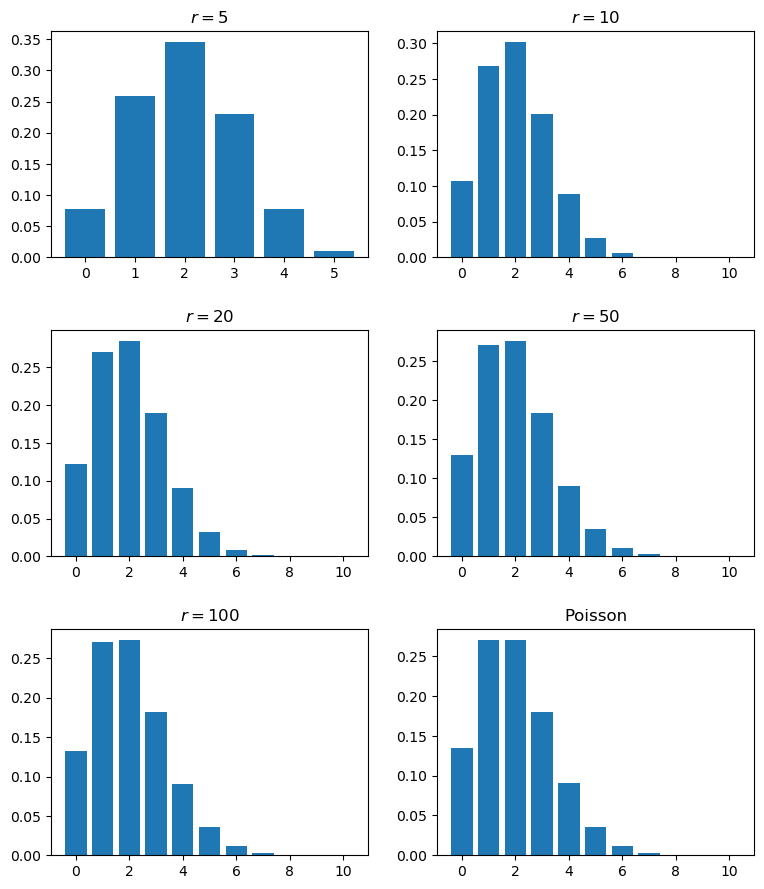

In [57]:
def probs(r):
    return [polinomial(n, r, 2/r) for n in range(r+1)]

fig = plt.figure(figsize=(8,12), dpi= 100)

ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)

ax1.bar(range(5+1), probs(5))
ax2.bar(range(10+1), probs(10))
ax3.bar(range(10+1), probs(20)[:11])
ax4.bar(range(10+1), probs(50)[:11])
ax5.bar(range(10+1), probs(100)[:11])
ax6.bar(range(10+1), [poisson(n, 2) for n in range(10+1)])
        
ax1.set_title('$r = 5$')
ax2.set_title('$r = 10$')
ax3.set_title('$r = 20$')
ax4.set_title('$r = 50$')
ax5.set_title('$r = 100$')
ax6.set_title('Poisson')

fig.tight_layout(pad=2.0)


fig.show()

Vemos que la distribución se acerca a la de Poisson para $r$ grande.

### Tarea 5.7

En ausencia de una señal, un cierto detector de partículas en promedio detecta $2$ impactos por segundo debidos a una contaminación de fondo. Durante una medición se obtienen las siguientes observaciones (esta es una lista del número de señales por cada segundo de duración del experimento):

In [36]:
mediciones = [2, 3, 3, 3, 0, 1, 2, 2, 0, 4, 10, 0, 2, 4, 6, 3, 2, 1, 1, 1]

Compare estos resultados con la distribución de Poisson. Discuta en cuáles intervalos cree usted que se detectó una señal que no es contaminación.

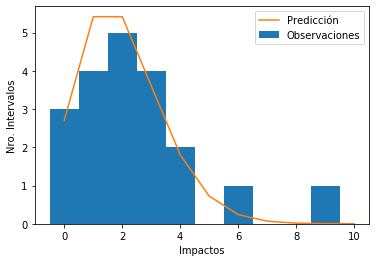

In [68]:
# Graficamos un histograma de las mediciones

plt.hist(mediciones, align='left', label='Observaciones')

# Comparamos con el número predicho según la distribución de Poisson
dist_poisson = np.array([poisson(n, 2) for n in range(10+1)])

# Para obtener la predicción multiplicamos la probabilidad por el nro
# total de intervalos
plt.plot(range(10+1), 20*dist_poisson, label='Predicción') 

plt.xlabel("Impactos")
plt.ylabel("Nro. Intervalos")
plt.legend()
plt.show()

La distribución es similar a la de Poisson excepto los intervalos con $6$ o $10$ impactos. Veamos sus respectivas probabilidades.

In [69]:
poisson(6,2)

0.012029802954365574

In [70]:
poisson(10,2)

3.8189850648779595e-05

La probabilidad de observar $6$ impactos es del $1\%$ tal que es poco probable, pero no podemos descartar que sea el resultado de una fluctuación estadística (después de todo tenemos 20 intervalos). En cambio la probabilidad de registrar $10$ impactos es muy pequeña, tal que es muy probable que sea una detección.

### Tarea 5.8

Problema 3.3 del libro "Statistics - A guide to the use of statistical methods in the physical sciences", de R. J. Barlow, Wiley, 1989

Durante una lluvia de meteoritos se observan $15.7$ estrellas fugaces cada hora en promedio. Grafique la distribución de probabilidad de observar $n$ estrellas fugaces en media hora.

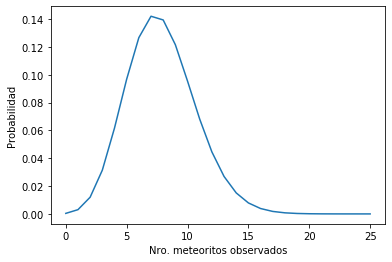

In [77]:
# Es la probabilidad de obtener un número de eventos en un cierto intervalo
# Lo descrbimos con la distribución de Poisson.

lamda = 15.7/2
num = 25
dist_poisson = np.array([poisson(n, lamda) for n in range(num+1)])
plt.plot(range(num+1), dist_poisson)
plt.xlabel('Nro. meteoritos observados')
plt.ylabel('Probabilidad')
plt.show()

### Tarea 5.9

Problema 3.1 del libro "Statistics - A guide to the use of statistical methods in the physical sciences", de R. J. Barlow, Wiley, 1989

Un cierto sistema de defensa contra misiles balísticos tiene una eficiencia del $95\%$. Grafique la probabilidad de interceptar todos los misiles lanzados por un agresor, si este lanza $n$ misiles, en función de $n$. ¿Cuántos misiles debe lanzar un agresor para tener una probabilidad de $0.5$ de que al menos uno logre impactar?

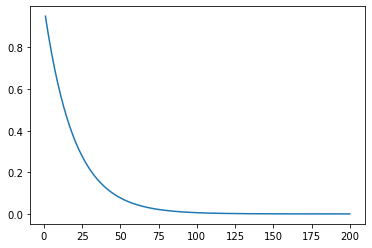

In [82]:
n_max = 200
ns = np.arange(1,n_max + 1)
probs = [binomial(n, n, 0.95) for n in range(1, n_max + 1)]
plt.plot(ns, probs)

Para responder usamos la fórmula de la distribución binomial

$$
1 - 0.95^n > 0.5
$$

despejando $n$

$$
n > \ln 0.5/\ln 0.95
$$

In [83]:
np.log(0.5)/np.log(0.95)

13.513407333964874

Efectivamente la probabilidad de interceptar $14$ misiles es apenas menor que $0.5$

In [86]:
binomial(14, 14, 0.95)

0.48767497911552954

### Tarea 5.10

Un sensor recibe en promedio $50$ partículas por minuto. Ese sensor está diseñado tal que puede detectar si fue impactado por al menos una partícula, pero no tiene ninguna información sobre cuántas partículas lo impactaron.

El sensor se encendió durante un segundo e indicó impacto. Grafique la distribución de probabilidad de que ese pixel haya sido impactado por $n$ partículas.

Esta es la probabilidad condicional

$$ P(n; \lambda| n \geq 1) = \frac{P(n; \lambda)}{1 - P(0;\lambda)}$$

donde $\lambda = 50/60$ y esta ecuación vale para $n>0$.

Text(0, 0.5, 'Probabilidad')

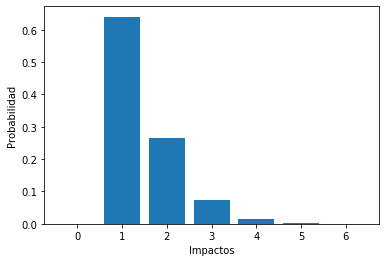

In [96]:
lamda = 50/60

def prob(n):
    if n == 0:
        return 0
    else:
        return poisson(n, lamda)/(1 - poisson(0,lamda))

nmax = 7
ns = np.arange(nmax)
probs = [prob(n) for n in ns]
plt.bar(ns, probs)
plt.xlabel('Impactos')
plt.ylabel('Probabilidad')

In [2]:
(63*31 + 16)/32

61.53125